In [150]:
import numpy as np
import matplotlib.pyplot as plt

In [151]:
alpha = 0.01
p = 0.8
gamma = 1
epochs = 2000

In [152]:
def rewardnstate(a, s):
    r, state, terminal = P[s][a]
    if s==1:
        r = r + np.random.uniform(-1, 1)
    return r, state, terminal

def act_functn(Q, state, state_visits, nAfes):
    #eps = 0.2
    #eps = 1/np.power(state_visits[state], 0.2)
    eps = 1/np.sqrt(state_visits[state])
    if np.random.choice([True, False], p=[1-eps, eps]):
        action = np.argmax(Q[state, :nAfes[state]])
    else:
        action = np.random.choice(nAfes[state])
    return action



# Qlearning

In [161]:
mu = -1
nS, nA = 3, 8
nAfes = [1, 8, 2]
start_state = 2

P = {
    0:{0: (0, 0, True)}, #state:{action: (reward, next state, terminal)}
    1:{0: (mu, 0, True),
       1: (mu, 0, True),
       2: (mu, 0, True),
       3: (mu, 0, True),
       4: (mu, 0, True),
       5: (mu, 0, True),
       6: (mu, 0, True),
       7: (mu, 0, True)}, 
    2:{0: (0, 1, False),
       1: (0, 0, True)}
}

In [172]:
maximal_value = []
np.random.seed(3)
count_matrix = np.ones([nS, nA])
Q = np.random.random([nS, nA])-1
Q[0] = 0
state_visits = np.ones(nS)
pref_list = []
for i in range(5000):
    state = start_state
    terminal = False
    while(not terminal):
        action = act_functn(Q, state, state_visits, nAfes)
        reward, next_state, terminal = rewardnstate(action, state)
        alpha = 1/np.power(count_matrix[state, action], p)
        Q[state, action] += alpha*(reward + gamma*np.max(Q[next_state, :nAfes[next_state]]) - Q[state, action])
        count_matrix[state, action] += 1
        state_visits[state] += 1
        maximal_value.append(np.max(Q[start_state, :nAfes[start_state]]))
        state = next_state
    pref_list.append(Q[start_state, 0]-Q[start_state, 1])

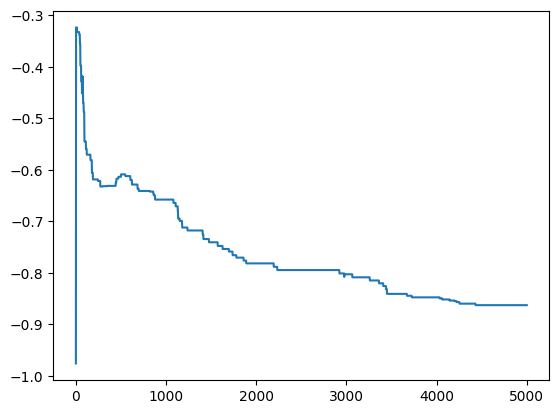

-0.8628084518715267


In [173]:
plt.plot(pref_list)
plt.show()
print(pref_list[-1])

# mu = 1, mu = -1
# 0.9998, -0.6611 1000 epochs
# 0.9932, -0.7670 3000 epochs
# 1.0008, -0.7929 5000 epochs

# Double Qlearning

In [182]:
mu = -1
nS, nA = 3, 8
nAfes = [1, 8, 2]
start_state = 2

P = {
    0:{0: (0, 0, True)}, #state:{action: (reward, next state, terminal)}
    1:{0: (mu, 0, True),
       1: (mu, 0, True),
       2: (mu, 0, True),
       3: (mu, 0, True),
       4: (mu, 0, True),
       5: (mu, 0, True),
       6: (mu, 0, True),
       7: (mu, 0, True)}, 
    2:{0: (0, 1, False),
       1: (0, 0, True)}
}

In [183]:
maximal_value_a = []
maximal_value_b = []
np.random.seed(0)
count_matrix_a = np.ones([nS, nA])
count_matrix_b = np.ones([nS, nA])
Qa = np.random.random([nS, nA])
Qb = np.random.random([nS, nA])
Qa[0], Qb[0] = 0, 0
state_visits = np.ones(nS)
pref_list = []
for i in range(500):
    state = start_state
    terminal = False
    while(not terminal):
        action = act_functn(Qa if np.random.choice(2) else Qb, state, state_visits, nAfes)
        reward, next_state, terminal = rewardnstate(action, state)
        if(np.random.choice(2)):
            alpha_a = 1/np.power(count_matrix_a[state, action], p)
            action_star = np.argmax(Qa[next_state, :nAfes[next_state]])
            Qa[state, action] += alpha_a*(reward + gamma*Qb[next_state, action_star] - Qa[state, action])
            count_matrix_a[state, action] += 1
            state_visits[state] += 1
            maximal_value_a.append(np.max(Qa[start_state, :nAfes[start_state]]))
        else:
            alpha_b = 1/np.power(count_matrix_b[state, action], p)
            action_star = np.argmax(Qb[next_state, :nAfes[next_state]])
            Qb[state, action] += alpha_b*(reward + gamma*Qa[next_state, action_star] - Qb[state, action])
            count_matrix_b[state, action] += 1
            state_visits[state] += 1
            maximal_value_b.append(np.max(Qb[start_state, :nAfes[start_state]]))
        state = next_state
    pref_list.append((Qa[start_state, 0]+Qb[start_state, 0]-Qa[start_state, 1]-Qb[start_state, 1])/2)

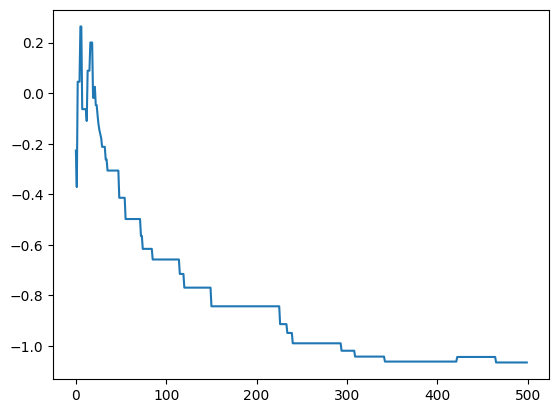

-1.0648523521741562


In [184]:
plt.plot(pref_list)
plt.show()
print(pref_list[-1])

# mu = 1, mu = -1
# 1.0131, -0.9032
# 0.9673, -0.9158
# 1.0065, -0.9677